#### 고혈압 환자집단 (SICK_SYM1:'I10', object)

### 목표변수 심결본인부담금 (EDC_SBA, int64)
### 설명변수 
- 병원방문경로(FORM_CD, int64)  02 : 의과입원 03 : 의과외래 08 : 보건기관외래
- 수술여부(OPRTN_YN, int64) 0: 미수술 9: 수술
- 진료결과(MCARE_RSLT_TYPE, float64) 1: 계속 2: 이송 3: 회송 4: 사망 5: 기타 9: 퇴원 또는 외래치료 종결

In [4]:
%conda install pymongo

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\04-02\anaconda3

  added / updated specs:
    - pymongo


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-23.7.3               |  py311haa95532_0         1.3 MB
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following packages will be UPDATED:

  conda                              23.7.2-py311haa95532_0 --> 23.7.3-py311haa95532_0 




conda-23.7.3         | 1.3 MB    |            |   0% 
conda-23.7.3         | 1.3 MB    | ##6        |  27% 
conda-23.7.3         | 1.3 MB    | ########## | 100% 
conda-23.7.3         | 1.3 MB    | ########## | 100% 
                                                     


Preparing transaction: ...working... done
Verifying transaction:

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pymongo as mg
import pandas as pd
from scipy.stats import chi2_contingency
client = mg.MongoClient(host='mongodb://localhost:27017')
database = client['db_NHIS']
collection = database['merged_collection6']
mpl.rc('font', family = 'Malgun Gothic')
df_D20 = pd.read_csv('../NSC2_D20.csv')
df_D20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137163 entries, 0 to 137162
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          137163 non-null  int64  
 1   _id                 137163 non-null  object 
 2   RN_INDI             137163 non-null  int64  
 3   BTH_YYYY            137163 non-null  object 
 4   DTH_YYYYMM          10269 non-null   float64
 5   COD1                8473 non-null    object 
 6   COD2                998 non-null     object 
 7   RN_KEY              137163 non-null  int64  
 8   RN_INST             137163 non-null  int64  
 9   MDCARE_STRT_DT      137163 non-null  int64  
 10  FORM_CD             137163 non-null  int64  
 11  MCARE_SUBJ_CD       137163 non-null  int64  
 12  SICK_SYM1           137163 non-null  object 
 13  OFIJ_TYPE           134428 non-null  object 
 14  OPRTN_YN            137163 non-null  int64  
 15  MDCARE_DD_CNT       137163 non-nul

C:\Users\04-02\AppData\Local\Temp\ipykernel_5304\1855560261.py:13: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_D20 = pd.read_csv('../NSC2_D20.csv')


In [50]:
# 'SICK_SYM1'이 'I10'인 고혈압 환자들의 데이터 추출

df_D20_hyper = df_D20[df_D20['SICK_SYM1'] == 'I10']
df_D20_hyper

,Unnamed: 0,_id,RN_INDI,BTH_YYYY,DTH_YYYYMM,COD1,COD2,RN_KEY,RN_INST,MDCARE_STRT_DT,...,OPRTN_YN,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,EDC_ADD_RT,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,STD_YYYY
190,190,64e6c14fe04b422536ad25dd,646257,1921LE,200805.0,A15-A19,NaN,2002070306096,57097,20020710,...,0,1,1,30,5.0,0.15,7570,3000,4570,2002
195,195,64e6c14fe04b422536ad25e2,646257,1921LE,200805.0,A15-A19,NaN,2002080588993,57097,20020805,...,0,2,2,60,5.0,0.15,18160,6000,12160,2002
197,197,64e6c14fe04b422536ad25e4,646257,1921LE,200805.0,A15-A19,NaN,2002100841957,57097,20021017,...,0,1,1,30,5.0,0.15,7570,3000,4570,2002
284,284,64e6c14fe04b422536ad263b,646257,1921LE,200805.0,A15-A19,NaN,2007101419963,75196,20071008,...,0,1,1,7,1.0,0.15,14200,4200,10000,2007
769,769,64e6c14fe04b422536ad2820,966199,1921LE,201409.0,J69,NaN,2004030950967,44114,20040312,...,0,1,1,7,5.0,0.15,7310,1500,5810,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124484,124484,64e6c178e04b422536af0b75,314882,2005,NaN,NaN,NaN,2005120635229,110842,20051220,...,0,1,1,30,1.0,0.15,9050,3000,6050,2005
124485,124485,64e6c178e04b422536af0b76,314882,2005,NaN,NaN,NaN,2005060585142,110842,20050614,...,0,1,1,30,1.0,0.15,9050,3000,6050,2005
124486,124486,64e6c178e04b422536af0b77,314882,2005,NaN,NaN,NaN,2005070407648,110842,20050716,...,0,1,1,30,1.0,0.15,9050,3000,6050,2005
124495,124495,64e6c178e04b422536af0b80,314882,2005,NaN,NaN,NaN,2006010136092,110842,20060123,...,0,1,1,30,1.0,0.15,9380,3000,6380,2006


In [51]:
df_V3 = df_D20_hyper[['FORM_CD','OPRTN_YN','MCARE_RSLT_TYPE','EDC_SBA']]
df_V3

,FORM_CD,OPRTN_YN,MCARE_RSLT_TYPE,EDC_SBA
190,3,0,5.0,3000
195,3,0,5.0,6000
197,3,0,5.0,3000
284,3,0,1.0,4200
769,3,0,5.0,1500
...,...,...,...,...
124484,3,0,1.0,3000
124485,3,0,1.0,3000
124486,3,0,1.0,3000
124495,3,0,1.0,3000


In [52]:
unique_values = df_V3['EDC_SBA'].unique()
unique_values

array([  3000,   6000,   4200,   1500,   6470,   3500,   5500,  67860,
         4900,   6900,   8580,   2900,  57300,   4000,  19700,  51000,
         3100,   9000,  14000,    350,   7020,  10750,  39270,  10800,
        33290,  34190,  11090,  22180,  11420,   5320,  13640,   5440,
         7220,  36020,   5540,  15850,   5600,  35100,  12300,  12600,
         4500,   4600,   6600,   2800,   3400,   2500,   9600,   2600,
         3600,      0,  12700,   9080,   5020,  47770,   5200,  22530,
        10410,  48260,   2400,   7800,  10650,   6400,  14900,  29000,
       126600,   3800,  78500,  10180,    900,  12000,  24100,   5840,
         5180,  16290,   5950,   6990,   5710,   5700,   6100,   8300,
         8000,   7900,   5800,   1000,  16700,    500,  15600,  32300,
        12110,   5330,  13600,  11760,   5450,   4400,  31970,  31900,
         2700,   6200,   1200,   3300,   4700,   4800,  13700,   8240,
         8190,  34600,  17670,   5650,  10100,  19310,  12440,   6320,
      

In [63]:
df_V3['EDC_SBA'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4629 entries, 190 to 124590
Series name: EDC_SBA
Non-Null Count  Dtype
--------------  -----
4629 non-null   int64
dtypes: int64(1)
memory usage: 72.3 KB


In [55]:
unique_values = df_V3['FORM_CD'].unique()
unique_values

array([3, 8, 2], dtype=int64)

In [57]:
unique_values = df_V3['OPRTN_YN'].unique()
unique_values

array([0, 9], dtype=int64)

In [58]:
unique_values = df_V3['MCARE_RSLT_TYPE'].unique()
unique_values

array([ 5.,  1.,  9., nan,  2.])

In [59]:
df_V3['FORM_CD'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4629 entries, 190 to 124590
Series name: FORM_CD
Non-Null Count  Dtype
--------------  -----
4629 non-null   int64
dtypes: int64(1)
memory usage: 72.3 KB


In [60]:
df_V3.dtypes

FORM_CD              int64
OPRTN_YN             int64
MCARE_RSLT_TYPE    float64
EDC_SBA              int64
dtype: object

In [62]:
df_V3.describe()[:2] # 

,FORM_CD,OPRTN_YN,MCARE_RSLT_TYPE,EDC_SBA
count,4629.000000,4629.000000,4205.000000,4629.000000
mean,3.445021,0.005833,1.899168,4627.070642


In [15]:
continuos_list = df_V3.describe().columns.to_list()

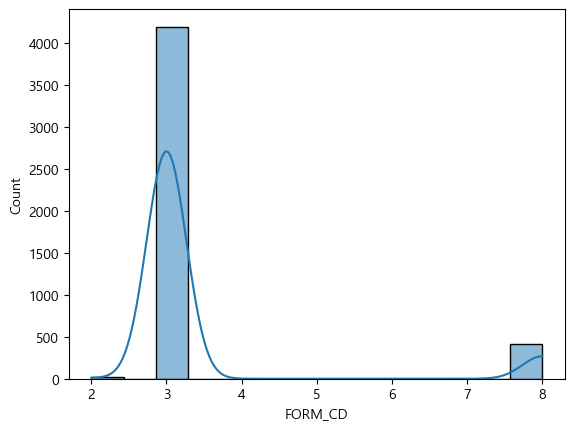

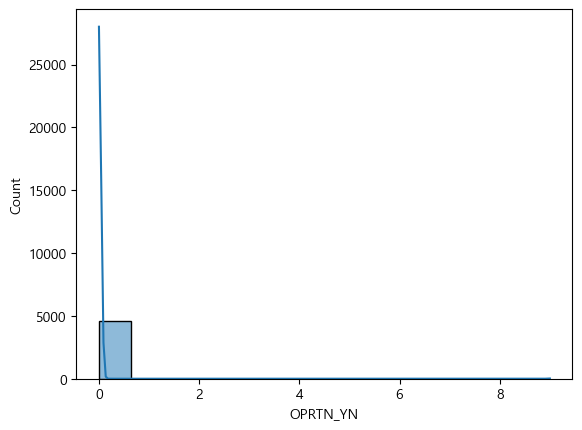

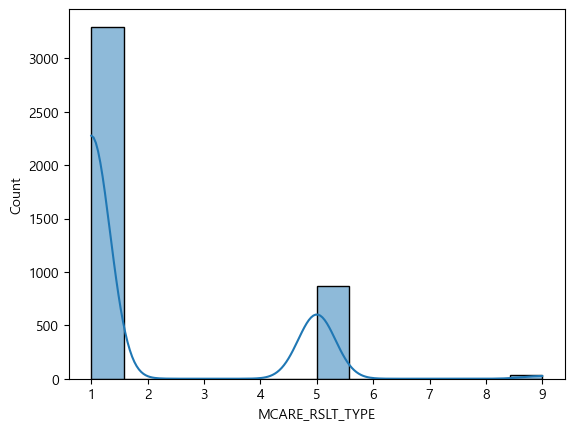

In [16]:
for continuos in continuos_list :
    sns.histplot(data=df_V3, x=continuos, kde=True)
    plt.show()

#### 고혈압 환자집단의 심결본인 부담금 평균 (4627.070641607259)

In [96]:
HypertensivePatient_avg = df_D20_hyper['EDC_SBA'].mean()
HypertensivePatient_avg

4627.070641607259

#### 1. 병원방문경로와 심결본인부담금 
-  02 : 의과입원 03 : 의과외래 08 : 보건기관외래

In [69]:
df_HV = df_V3[['FORM_CD', 'EDC_SBA']]
df_HV

,FORM_CD,EDC_SBA
190,3,3000
195,3,6000
197,3,3000
284,3,4200
769,3,1500
...,...,...
124484,3,3000
124485,3,3000
124486,3,3000
124495,3,3000


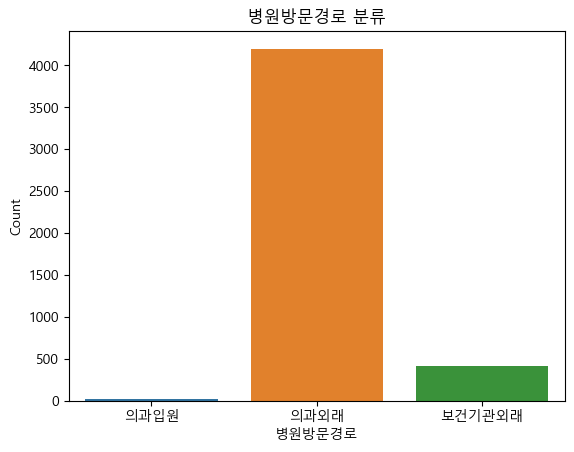

In [86]:
# Countplot 생성
HospitalVisitRoute_chart = sns.countplot(data=df_HV, x='FORM_CD')

# xticks 및 xticklabels 설정
xticks_labels = ['의과입원', '의과외래', '보건기관외래']
xticks_locs = [0, 1, 2]  # 각 레이블에 해당하는 위치

plt.xlabel('병원방문경로')
plt.ylabel('Count')
plt.title('병원방문경로 분류')

# xticks와 xticklabels 설정
plt.xticks(ticks=xticks_locs, labels=xticks_labels)

# 그래프 표시
plt.show()

In [71]:
# 병원방문경로(FORM_CD)의 따른 심결본인부담금
average = df_HV.groupby('FORM_CD')['EDC_SBA'].mean()
average

FORM_CD
2    164592.666667
3      4193.253156
8      3234.578313
Name: EDC_SBA, dtype: float64

#### 2.수술여부와 심결본인부담금 
-0: 미수술 9: 수술

In [89]:
df_S = df_V3[['OPRTN_YN', 'EDC_SBA']]
df_S

,OPRTN_YN,EDC_SBA
190,0,3000
195,0,6000
197,0,3000
284,0,4200
769,0,1500
...,...,...
124484,0,3000
124485,0,3000
124486,0,3000
124495,0,3000


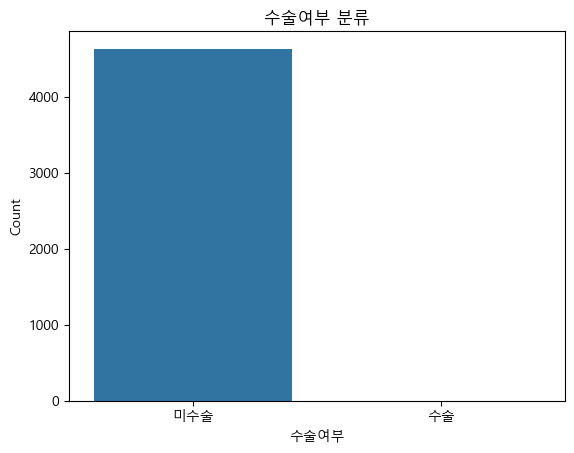

In [87]:
# Countplot 생성
Surgery_chart = sns.countplot(data=df_S, x='OPRTN_YN')
Surgery_chart

# xticks 및 xticklabels 설정
xticks_labels = ['미수술', '수술']
xticks_locs = [0, 1]  # 각 레이블에 해당하는 위치

plt.xlabel('수술여부')
plt.ylabel('Count')
plt.title('수술여부 분류')

# xticks와 xticklabels 설정
plt.xticks(ticks=xticks_locs, labels=xticks_labels)

# 그래프 표시
plt.show()

In [90]:
# 수술여부에 따른 심결본인부담금 평균 비교
average = df_S.groupby('OPRTN_YN')['EDC_SBA'].mean()
average

OPRTN_YN
0     4567.557285
9    96396.666667
Name: EDC_SBA, dtype: float64

#### 3.진료결과와 심결본인부담금 
- 1: 계속 2: 이송 3: 회송 4: 사망 5: 기타 9: 퇴원 또는 외래치료 종결

In [92]:
df_R = df_V3[['MCARE_RSLT_TYPE', 'EDC_SBA']]
df_R

,MCARE_RSLT_TYPE,EDC_SBA
190,5.0,3000
195,5.0,6000
197,5.0,3000
284,1.0,4200
769,5.0,1500
...,...,...
124484,1.0,3000
124485,1.0,3000
124486,1.0,3000
124495,1.0,3000


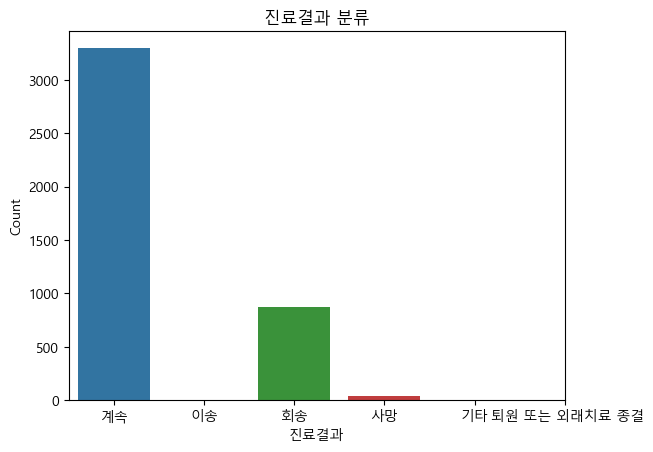

In [93]:
# Countplot 생성
Surgery_chart = sns.countplot(data=df_R, x='MCARE_RSLT_TYPE')
Surgery_chart

# xticks 및 xticklabels 설정
xticks_labels = ['계속','이송', '회송', '사망','기타',' 퇴원 또는 외래치료 종결']
xticks_locs = [0, 1, 2, 3, 4, 5]  # 각 레이블에 해당하는 위치

plt.xlabel('진료결과')
plt.ylabel('Count')
plt.title('진료결과 분류')

# xticks와 xticklabels 설정
plt.xticks(ticks=xticks_locs, labels=xticks_labels)

# 그래프 표시
plt.show()

In [95]:
# 진료결과에 따른 심결본인부담금 평균 비교
#  1: 계속 2: 이송 3: 회송 4: 사망 5: 기타 9: 퇴원 또는 외래치료 종결
# 3번과 4번은 결과 집계되지 않음.
average = df_R.groupby('MCARE_RSLT_TYPE')['EDC_SBA'].mean()
average

MCARE_RSLT_TYPE
1.0     4757.691141
2.0     1000.000000
5.0     3875.396096
9.0    26633.243243
Name: EDC_SBA, dtype: float64